In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
%matplotlib inline

from keras.applications.vgg16 import preprocess_input 
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image

Using TensorFlow backend.


In [ ]:
from keras import applications

input_img = tf.placeholder(tf.float32, shape=(None, 224, 224, 3))

model = applications.VGG16(weights='imagenet', input_tensor=input_img)

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [26]:
img_width = 224
img_height = 224

# input_img = model.input
# print(input_img)

# get the symbolic outputs of each "key" layer (we gave them unique names).
layer_dict = dict([(layer.name, layer) for layer in model.layers])

for key, val in layer_dict.items():
    print(key + ": " + str(val))

Tensor("input_2:0", shape=(?, 224, 224, 3), dtype=float32)
block3_conv1: <keras.layers.convolutional.Conv2D object at 0x119189828>
block3_pool: <keras.layers.pooling.MaxPooling2D object at 0x11586ce48>
block1_conv2: <keras.layers.convolutional.Conv2D object at 0x11580a208>
block5_conv3: <keras.layers.convolutional.Conv2D object at 0x119104630>
block2_conv2: <keras.layers.convolutional.Conv2D object at 0x1187b8b00>
fc1: <keras.layers.core.Dense object at 0x1191cf780>
block5_pool: <keras.layers.pooling.MaxPooling2D object at 0x1191aad68>
predictions: <keras.layers.core.Dense object at 0x119326470>
block2_pool: <keras.layers.pooling.MaxPooling2D object at 0x119174908>
fc2: <keras.layers.core.Dense object at 0x119311a90>
block4_conv1: <keras.layers.convolutional.Conv2D object at 0x1202b0550>
block3_conv2: <keras.layers.convolutional.Conv2D object at 0x11911cda0>
block4_conv3: <keras.layers.convolutional.Conv2D object at 0x1202d6b70>
block4_pool: <keras.layers.pooling.MaxPooling2D object at

## get the image example

(1, 224, 224, 3)


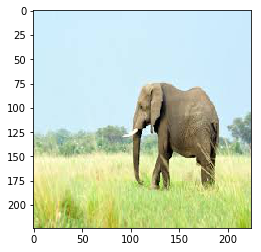

In [25]:
img_path = 'elephant.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

print(x.shape)
plt.imshow(img)

## how to get prenormalized classification loss to improve performance

In [15]:
from keras import backend as K

def get_classification_loss(layer_dict, instance, index):
    classification_output = layer_dict["predictions"].output
    return classification_output[instance][index]

loss = get_classification_loss(layer_dict, 0, 10)

In [16]:
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [28]:
sess = tf.InteractiveSession()

with sess.as_default():
    saliency_map = grads.eval(feed_dict={input_img: x})
    
saliency_map

FailedPreconditionError: Attempting to use uninitialized value block1_conv1_1/kernel
	 [[Node: block1_conv1_1/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@block1_conv1_1/kernel"], _device="/job:localhost/replica:0/task:0/cpu:0"](block1_conv1_1/kernel)]]

Caused by op 'block1_conv1_1/kernel/read', defined at:
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-4-2a018d4bffee>", line 3, in <module>
    model = applications.VGG16(weights='imagenet')
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/keras/applications/vgg16.py", line 111, in VGG16
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 528, in __call__
    self.build(input_shapes[0])
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/keras/layers/convolutional.py", line 134, in build
    constraint=self.kernel_constraint)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/keras/engine/topology.py", line 364, in add_weight
    weight = K.variable(initializer(shape), dtype=K.floatx(), name=name)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/keras/backend/tensorflow_backend.py", line 286, in variable
    v = tf.Variable(value, dtype=_convert_string_dtype(dtype), name=name)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 226, in __init__
    expected_shape=expected_shape)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/variables.py", line 344, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1490, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/zhaocongyuan/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value block1_conv1_1/kernel
	 [[Node: block1_conv1_1/kernel/read = Identity[T=DT_FLOAT, _class=["loc:@block1_conv1_1/kernel"], _device="/job:localhost/replica:0/task:0/cpu:0"](block1_conv1_1/kernel)]]


In [22]:
from scipy.misc import imsave
from matplotlib import pyplot as plt
%matplotlib inline 

# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5    # center to 0.5 for the [0, 1] interval
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

img = input_img_data[0]
img = deprocess_image(img)
imsave('%s_filter_%d.png' % (layer_name, filter_index), img)
plt.imshow(img)

NameError: name 'layer_name' is not defined